# Inhomogeneous processes

In [1]:
# NBVAL_IGNORE_OUTPUT

import numpy as np
import matplotlib.pyplot as plt

from gcdyn import bdms, mutators, poisson

/opt/miniconda3/envs/gcdyn/lib/python3.9/site-packages/ete3-3.1.2-py3.7.egg/ete3/evol/parser/codemlparser.py:221: SyntaxWarning: "is" with a literal. Did you mean "=="?
/opt/miniconda3/envs/gcdyn/lib/python3.9/site-packages/ete3-3.1.2-py3.7.egg/ete3/evol/parser/codemlparser.py:221: SyntaxWarning: "is" with a literal. Did you mean "=="?


## Phenotype-modulated model

### Parameters

#### Response functions

For the birth rate we'll include an external field $f(t)$ and interaction $\phi(x, f(t))$ for temporally modulating the phenotype response

In [2]:
def f(t):
    return 1 / (1 + np.exp(-1 * t)) - 1 / 2

def φ(x, f):
    return x - f

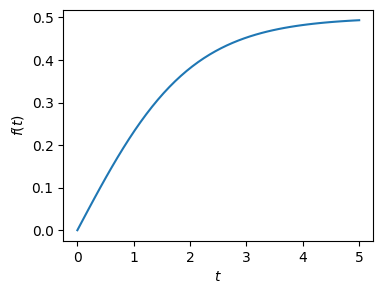

In [3]:
t = np.linspace(0, 5)
plt.figure(figsize=(4, 3))
plt.plot(t, f(t), label="f(t)")
plt.xlabel("$t$")
plt.ylabel("$f(t)$")
plt.show()

In [4]:
birth_rate = poisson.ModulatedPhenotypeResponse(poisson.SigmoidResponse(xscale=2.0, xshift=0, yscale=3, yshift=0.0),
                                                f, φ)
death_rate = poisson.ConstantResponse(0.1)
mutation_rate = poisson.ConstantResponse(1.0)

#### Mutator

In [5]:
mutator = mutators.GaussianMutator(shift=-0.1, scale=0.1)

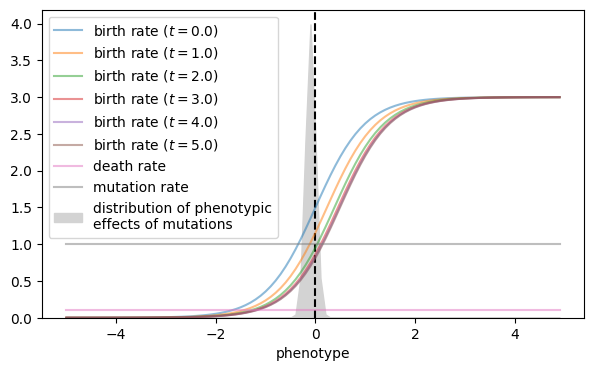

In [6]:
# NBVAL_IGNORE_OUTPUT

x_grid = np.arange(-5, 5, 0.1)

plt.figure(figsize=(7, 4))
plt.axvline(0, color="k", linestyle="--")
for t in np.linspace(0, 5, 6):
    plt.plot(x_grid, birth_rate.λ_phenotype_time(x_grid, t), label=f"birth rate ($t={t}$)", alpha=0.5)
plt.plot(x_grid, death_rate.λ_phenotype(x_grid), label="death rate", alpha=0.5)
plt.plot(x_grid, mutation_rate.λ_phenotype(x_grid), label="mutation rate", alpha=0.5)
plt.fill_between(x_grid, mutator.prob(0, x_grid), color="lightgrey", label="distribution of phenotypic\neffects of mutations")
plt.xlabel('phenotype')
# plt.ylabel('event rate')
plt.ylim(0, None)
plt.legend()
plt.show()

### Simulate

In [7]:
rng = np.random.default_rng(seed=0)

In [8]:
time_to_sampling = 5
for iter in range(1000):
    try:
        tree = bdms.TreeNode()
        tree.x = 0
        tree.evolve(
            time_to_sampling,
            birth_response=birth_rate,
            death_response=death_rate,
            mutation_response=mutation_rate,
            mutator=mutator,
            min_survivors=100,
            birth_mutations=False,
            seed=rng,
        )
        print(f"try {iter + 1} succeeded, tip count: {len(tree)}")
        break
    except bdms.TreeError as e:
        print(f"try {iter + 1} failed, {e}", flush=True)
        continue

try 1 failed, 'number of survivors 12 is less than min_survivors=100'
try 2 failed, 'number of survivors 0 is less than min_survivors=100'
try 3 failed, 'number of survivors 61 is less than min_survivors=100'
try 4 failed, 'number of survivors 3 is less than min_survivors=100'
try 5 failed, 'number of survivors 17 is less than min_survivors=100'
try 6 failed, 'number of survivors 5 is less than min_survivors=100'
try 7 succeeded, tip count: 157


In [9]:
tree.sample_survivors(n=20, seed=rng)
tree.prune()

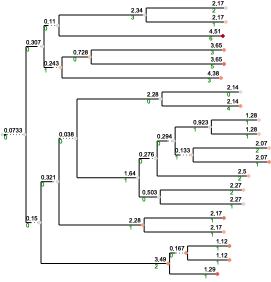

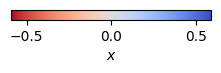

In [10]:
# NBVAL_SKIP

tree.render("%%inline")

## Rate-modulated model

### Parameters

#### Response functions

We'll modulate the birth rate to approximate a capacity constraint

In [11]:
def f(λ, x, t):
    return λ * np.exp(-0.2 * t)

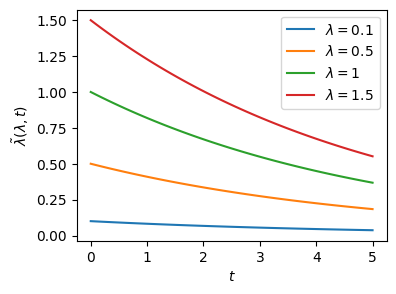

In [12]:
t = np.linspace(0, 5)
plt.figure(figsize=(4, 3))
for λ in [0.1, 0.5, 1, 1.5]:
    plt.plot(t, f(λ, None, t), label=f"$\lambda={λ}$")
plt.xlabel("$t$")
plt.ylabel(r"$\tilde\lambda(\lambda, t)$")
plt.legend()
plt.show()

In [13]:
birth_rate = poisson.ModulatedRateResponse(poisson.SigmoidResponse(xscale=2.0, xshift=0, yscale=3, yshift=0.0), f)

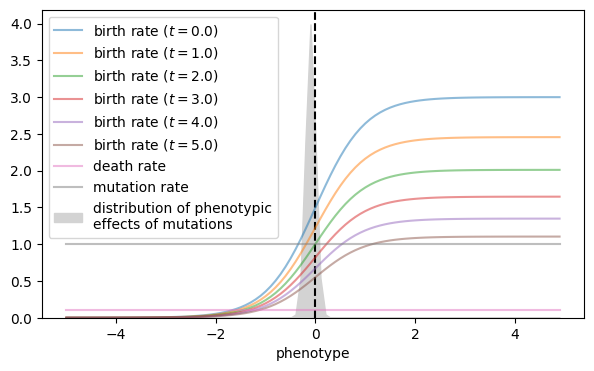

In [14]:
# NBVAL_IGNORE_OUTPUT

x_grid = np.arange(-5, 5, 0.1)

plt.figure(figsize=(7, 4))
plt.axvline(0, color="k", linestyle="--")
for t in np.linspace(0, 5, 6):
    plt.plot(x_grid, birth_rate.λ_phenotype_time(x_grid, t), label=f"birth rate ($t={t}$)", alpha=0.5)
plt.plot(x_grid, death_rate.λ_phenotype(x_grid), label="death rate", alpha=0.5)
plt.plot(x_grid, mutation_rate.λ_phenotype(x_grid), label="mutation rate", alpha=0.5)
plt.fill_between(x_grid, mutator.prob(0, x_grid), color="lightgrey", label="distribution of phenotypic\neffects of mutations")
plt.xlabel('phenotype')
# plt.ylabel('event rate')
plt.ylim(0, None)
plt.legend()
plt.show()

### Simulate

In [16]:
time_to_sampling = 5
for iter in range(1000):
    try:
        tree = bdms.TreeNode()
        tree.x = 0
        tree.evolve(
            time_to_sampling,
            birth_response=birth_rate,
            death_response=death_rate,
            mutation_response=mutation_rate,
            mutator=mutator,
            min_survivors=100,
            capacity=1000,
            birth_mutations=False,
            seed=rng,
        )
        print(f"try {iter + 1} succeeded, tip count: {len(tree)}")
        break
    except bdms.TreeError as e:
        print(f"try {iter + 1} failed, {e}", flush=True)
        continue

/Users/wsdewitt/github/gcdyn/gcdyn/poisson.py:513: RuntimeWarning: overflow encountered in double_scalars
  Δt = max(Δt - (self.Λ(node, Δt) - τ) / self.λ(node, Δt), 0.0)


try 1 failed, 'number of survivors 50 is less than min_survivors=100'
try 2 failed, 'number of survivors 35 is less than min_survivors=100'
try 3 failed, 'number of survivors 12 is less than min_survivors=100'
try 4 failed, 'number of survivors 8 is less than min_survivors=100'
try 5 failed, 'number of survivors 55 is less than min_survivors=100'
try 6 failed, 'number of survivors 54 is less than min_survivors=100'
try 7 failed, 'number of survivors 22 is less than min_survivors=100'
try 8 failed, 'number of survivors 98 is less than min_survivors=100'
try 9 failed, 'number of survivors 8 is less than min_survivors=100'
try 10 failed, 'number of survivors 0 is less than min_survivors=100'
try 11 failed, 'number of survivors 0 is less than min_survivors=100'
try 12 failed, 'number of survivors 35 is less than min_survivors=100'
try 13 failed, 'number of survivors 26 is less than min_survivors=100'
try 14 failed, 'number of survivors 60 is less than min_survivors=100'
try 15 failed, 'num

In [17]:
tree.sample_survivors(n=20, seed=rng)
tree.prune()

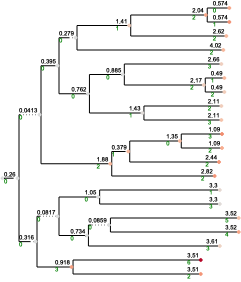

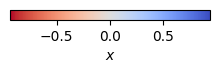

In [18]:
# NBVAL_SKIP

tree.render("%%inline")